T5_3

## Import packages

In [8]:
!nvidia-smi

Wed May  4 20:52:29 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.79       Driver Version: 511.79       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:2B:00.0  On |                  N/A |
|  0%   54C    P8    16W / 125W |   4934MiB /  6144MiB |      7%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
from sys import version
version

'3.7.13 (default, Mar 28 2022, 08:03:21) [MSC v.1916 64 bit (AMD64)]'

In [10]:
# # install StellarGraph if running on Google Colab
# import sys
# if 'google.colab' in sys.modules:
%pip install -q stellargraph[demos]==1.2.1

Note: you may need to restart the kernel to use updated packages.


In [47]:
# verify that we're using the correct version of StellarGraph for this notebook
import stellargraph as sg

# try:
#     sg.utils.validate_notebook_version("1.2.1")
# except AttributeError:
#     raise ValueError(
#         f"This notebook requires StellarGraph version 1.2.1, but a different version {sg.__version__} is installed.  Please see <https://github.com/stellargraph/stellargraph/issues/1172>."
#     ) from None

In [46]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from stellargraph import StellarGraph
import pandas as pd
import numpy as np
import stellargraph as sg
from stellargraph.mapper import PaddedGraphGenerator
from stellargraph.layer import DeepGraphCNN
from stellargraph import StellarGraph
from stellargraph import datasets
from sklearn import model_selection
from IPython.display import display, HTML
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten,  BatchNormalization
from tensorflow.keras.losses import binary_crossentropy, categorical_crossentropy
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [13]:
root_path = 'https://raw.githubusercontent.com/soeai/MAppGraph/gh-pages/data'


## Config setting

In [48]:
N = 20
t = 10
k = 10  # the number of rows for the output tensor (k = 10, 20)
T = 5
overlap = 3 # note: overlap depends on T
alllabels = [11102.0, 11202.0, 12101.0, 12201.0, 13101.0, 13102.0, 13103.0, 13201.0, 13202.0, 13302.0, 13403.0, 14101.0, 14102.0, 14202.0, 14302.0,
             15102.0, 15202.0, 15302.0, 16101.0, 16102.0, 16103.0, 16201.0, 16202.0, 16302.0, 16403.0, 17101.0, 17201.0, 17403.0, 18101.0, 18102.0, 
             18103.0, 18201.0, 18202.0, 18302.0, 18403.0]
appslabels = [1,2,3,4,5,6,7,8]
apps = ["d_hi_chrome",'d_hi_safari','l_hi_chrome','l_hi_ff','w_hi_chrome','w_hi_ff','w_hi_ie']
#['diijam', 'baomoi', 'fptplay', 'iQIYI', 'bigo', 'myradio', 'spotify', 'nhaccuatui', 'soundcloud', 'sachnoiapp', 
#         'phim247', 'popskid', 'truyenaudiosachnoiviet', 'vieon', 'voizfm', 'tunefm', 'wetv', 'zingmp3', 'truyenaudio', 'baohay24h',
#         'freefire', 'among_us', 'azar', 'comico', 'nimotv', 'mangatoon', 'medoctruyen', 'nhacvang', 'noveltoon', 'radiofm',
#         'vtvgo', 'tivi24h', 'tinder', 'tinmoi24h', 'tivi360', 'tiktok', 'linkedin', 'tiki', 'tinhte', 'lotus', 'tivi247',
#         'tivi_truyentranh_webtoon', 'tuoitre_online', 'vietnamworks', 'wallstreet_journal', 'cnn_news', 'bbc_news', 'twitter', 
#         'weeboo', 'twitch', 'vnexpress', 'topcv', 'toc_chien', 'wesing', 'hago', 'google_meet', 'dubsmash', 'facebook','hahalolo', 
#         'zalo', 'hello_yo', 'dan_tri', 'zoom', 'wikipedia', 'instagram', 'jobway', 'kaka', 'pinterest', 'quora', 'lazada', 'chess', 
#         'cake', 'mobile_legend', 'co_tuong_online', 'ted', 'telegram', 'starmarker', 'skype', 'soha', 'tango', 'thanhnien', 'snapchat', 
#         'tien_len', 'animal_restaurant', 'bida', 'cho_tot', 'messenger', 'netflix', 'nonolive', 'may', 'podcast_player', 'pubg', 
#         'partying', 'kenh14', 'lienquan_mobile', 'likee_lite', 'reddit', 'sendo', 'shopee', 'the_guardian', 'ola_party']

features = ['complete_max', 'complete_min', 'complete_mean', 'complete_mad', 'complete_std', 'complete_var', 'complete_skew',
       'complete_kurt', 'complete_pkt_num', 'complete_10per', 'complete_20per', 'complete_30per', 'complete_40per', 'complete_50per', 
        'complete_60per', 'complete_70per', 'complete_80per', 'complete_90per', 'out_max', 'out_min', 'out_mean', 'out_mad', 'out_std',
        'out_var', 'out_skew', 'out_kurt', 'out_pkt_num', 'out_10per', 'out_20per', 'out_30per', 'out_40per', 'out_50per', 'out_60per',
        'out_70per', 'out_80per', 'out_90per', 'in_max', 'in_min', 'in_mean', 'in_mad', 'in_std', 'in_var', 'in_skew', 'in_kurt', 
        'in_pkt_num', 'in_10per', 'in_20per', 'in_30per', 'in_40per', 'in_50per', 'in_60per', 'in_70per', 'in_80per', 'in_90per', 
        'protocol', 'flows_num', 'flow_length_mean', 'flow_pkt_num_mean', 'flow_duration_mean', 'ip1', 'ip2', 'ip3', 'ip4'
       ]

In [49]:
train_graphs_folder = r'E:\documents\Gnn\mapgraph\MAppGraph\mappgraph\notebooks\mydata'
#test_graphs_folder = 'E:/documents/MAppGraph/mappgraph/data/5_3/test_graphs/N20/t10'

## Loading graphs for training and testing

In [57]:
'''
Load graphs for one app
Input: app and folder that contains graphs of the app
Output: List of graphs (StellarGraph objects) and List of labels
'''
def graphs_one_app(app, graphs_folder):
  graphs = []

  app_graph_folder = os.path.join(graphs_folder, app)
  features_path = os.path.join(app_graph_folder, 'features.csv')
  weights_path = os.path.join(app_graph_folder, 'weights.csv')
  labels_path = os.path.join(app_graph_folder, 'labels.csv')
  features_df = pd.read_csv(features_path, index_col=0)
  weights_df = pd.read_csv(weights_path, index_col=0)
  labels_df = pd.read_csv(labels_path,index_col=0)
  labels = []
  graph_num = features_df['graph_id'].iloc[-1]
  # loop over all graphs of the app
  for i in range(1, graph_num+1):
    feature_df = features_df[features_df['graph_id'] == i]
    feature_df = feature_df[['IP_port'] + features + ['graph_id']]
    feature_df = feature_df.set_index('IP_port')
    weight_df = weights_df[weights_df['id'] == i].reset_index(drop=True)
    # drop graph_id column
    feature_df = feature_df.drop(['graph_id'], axis=1)
    weight_df = weight_df.drop(['id'], axis=1)
  
    if weight_df.shape[0] > 0:
      labels.append(int(str(labels_df[labels_df['id'] == i].iloc[0]['label'])[4])) # here to change label
      graph = StellarGraph(feature_df, weight_df,is_directed=True)
      graphs.append(graph)
  print(len(labels),len(graphs))
  return graphs, labels

In [51]:
'''
Load all graphs
Input: folder that contains graphs
Output: List of graphs (StellarGraph objects), List of graph_labels (dummy values) and List of labels (names of app)
'''
def generate_graphs(graphs_folder):
  # build a list of graphs and labels: note that only apply for more than 2 classes
  li = []
  labels = []
  idx = 0

  for app in apps:
    idx += 1
    print('Loading {} ... {}/{}'.format(app, idx, len(apps)))
    
    one_app_graphs, one_app_labels = graphs_one_app(app, graphs_folder)
    li.extend(one_app_graphs)
    labels.extend(one_app_labels)
    

  graph_labels = pd.get_dummies(labels)
  graphs = li

  print('...............................................................')

  return graphs, graph_labels, labels

Load graphs from csv files



In [58]:

graphs, labels, _ = generate_graphs(train_graphs_folder)
labels = labels.drop([825],axis=0)
graphs.pop(825)
print(set(list(labels)))

train_graphs , test_graphs , train_graph_labels , test_graph_labels = train_test_split(graphs,labels,stratify=labels,test_size=0.2)

# train_graphs, train_graph_labels, _ = generate_graphs(train_graphs_folder)
# test_graphs, test_graph_labels, _ = generate_graphs(test_graphs_folder)
train_size = len(train_graphs)

graph_labels = labels
classes = labels.columns

Loading d_hi_chrome ... 1/7
11 11
Loading d_hi_safari ... 2/7
439 439
Loading l_hi_chrome ... 3/7
51 51
Loading l_hi_ff ... 4/7
49 49
Loading w_hi_chrome ... 5/7
189 189
Loading w_hi_ff ... 6/7
53 53
Loading w_hi_ie ... 7/7
38 38
...............................................................
{1, 2, 3}


In [20]:
generator = PaddedGraphGenerator(graphs=graphs)

## Build GNN

In [21]:
layer_sizes = [1024, 1024, 1024, 512]

dgcnn_model = DeepGraphCNN(
    layer_sizes=layer_sizes,
    activations=["tanh", "tanh", "tanh", "tanh"],
    k=k,
    bias=False,
    generator=generator,
)
x_inp, x_out = dgcnn_model.in_out_tensors()

#------------------------------------------------------------------------------
x_out = Conv1D(filters=256, kernel_size=sum(layer_sizes), strides=sum(layer_sizes))(x_out)
x_out = MaxPool1D(pool_size=2)(x_out)

x_out = Conv1D(filters=512, kernel_size=5, strides=1)(x_out)

x_out = Flatten()(x_out)

x_out = Dense(units=1024, activation="relu")(x_out)
x_out = Dropout(rate=0.25)(x_out)

predictions = Dense(units=len(classes), activation="softmax")(x_out)

#------------------------------------------------------------------------------

model = Model(inputs=x_inp, outputs=predictions)

# using exponentialDecay to decrease the learning rate after 10 epochs
# lr =  initial_lr * decay_rate ^ (step / decay_steps)
batch_size = 256
decay_epoch = 20

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=(train_size//batch_size)*decay_epoch,
    decay_rate=0.9)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(
    optimizer=optimizer, loss=categorical_crossentropy, metrics=["acc"],
)

Instructions for updating:
Use fn_output_signature instead


In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, 63)]   0           []                               
                                                                                                  
 dropout (Dropout)              (None, None, 63)     0           ['input_1[0][0]']                
                                                                                                  
 input_3 (InputLayer)           [(None, None, None)  0           []                               
                                ]                                                                 
                                                                                                  
 graph_convolution (GraphConvol  (None, None, 1024)  64512       ['dropout[0][0]',            

In [23]:
gen = PaddedGraphGenerator(graphs=graphs)

train_gen = gen.flow(
    list(train_graph_labels.index - 1),
    targets=train_graph_labels.values,
    batch_size=256,
    symmetric_normalization=False,
)

test_gen = gen.flow(
    list(test_graph_labels.index - 1),
    targets=test_graph_labels.values,
    batch_size=256,
    symmetric_normalization=False,
)

## Training

In [24]:
class CustomSaver(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if epoch % 10 == 0 & epoch > 0:  # or save after some epoch, each k-th epoch etc.
            self.model.save(os.path.join(models_folder, "model_{}.hd5".format(epoch)))
# create and use callback:
saver = CustomSaver()

epochs = 150
history = model.fit(
    train_gen, callbacks=[saver], epochs=epochs, verbose=1, validation_data=test_gen, shuffle=True,
)

KeyboardInterrupt: 

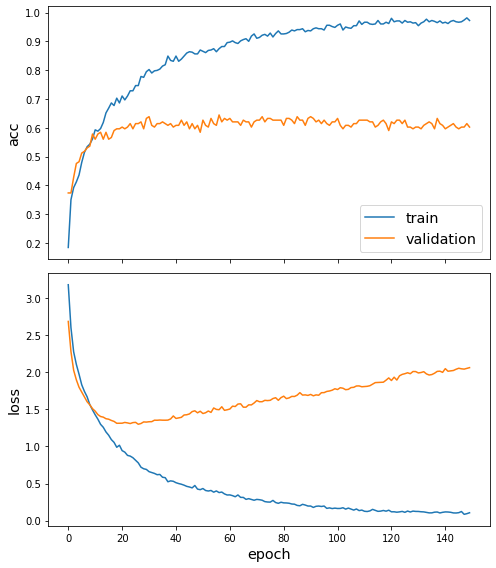

In [ ]:
sg.utils.plot_history(history)

## Testing

In [ ]:
# use the model to predict on testing data and get predicted labels
classes = [int(i) for i in range(29)]
# classes.append(5)
# classes.sort()
pred_prob = model.predict(test_gen)
pred_labels = np.argmax(pred_prob, axis=-1) 
# pred_labels = [classes.index(x) for x in list(pred_labels)]
print(set(pred_labels))

# get the true labels of the testing data
test_labels = np.argmax(test_graph_labels.values, axis=-1)
# test_labels = [str(x+1) for x in list(test_labels)]
# test_labels = [classes.index(x) for x in list(test_labels)]
print(set(test_labels))
conf = np.zeros((len(classes),len(classes)))#confusion_matrix(test_labels,pred_labels,labels=classes )
for i in range(len(pred_labels)):
    pred = pred_labels[i]
    true = test_labels[i]
    conf[true][pred] += 1
    

# l = np.ndarray.tolist(conf)

# t = []

# for i in l[:4] +l[-1:]+ l[4:-1]:
#     l = i[:-1]
#     l:list
#     l.insert(4,0)
#     t.append(l)



df = pd.DataFrame(conf)
df.to_csv("results_boa.csv")
# show the result as classification report
# print(classification_report(test_labels, pred_labels, target_names=list(set(test_labels+pred_labels)), digits=4))

{3, 4, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 24, 28}
{0, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28}


In [32]:
applabels = {1:'dropbox',2:'facebook',3:'google',4:'microsoft',5:'teamviewer',6:'twitter',7:'youtube',8:'other'}
browserslabels = {1:'chrome',2:'firefox',3:'IExplorer',4:'Safari'}
osesslabels = {1:'Linux',2:'Windows',3:'OSX'}
def classify(subclass,id):
    if subclass == "apps":
        return applabels.get(id)
    elif subclass == 'browsers':
        return browserslabels.get(id)
    elif subclass == 'osess':
        return osesslabels.get(id)
    elif subclass == 'boa':
        t = str(id)
        return f"{classify('apps',int(t[1]))}_{classify('browsers',int(t[2]))}_{classify('osess',int(t[4]))}"
    else:
        raise ValueError("non existent subclass gievn")

In [44]:
for i in test_graph_labels:
    print(classify('boa',i),len(test_graph_labels[test_graph_labels[i]==1]),len(labels[labels[i]==1]))

dropbox_chrome_Windows 1 5
facebook_chrome_Linux 0 2
facebook_firefox_Linux 0 2
google_chrome_Linux 5 22
google_chrome_Windows 14 71
google_chrome_OSX 1 5
google_firefox_Linux 4 17
google_firefox_Windows 0 2
google_IExplorer_Windows 0 0
google_Safari_OSX 30 149
microsoft_chrome_Windows 7 34
microsoft_firefox_Windows 4 20
microsoft_IExplorer_Windows 3 16
twitter_chrome_Linux 5 22
twitter_chrome_Windows 14 71
twitter_chrome_OSX 1 6
twitter_firefox_Linux 4 21
twitter_firefox_Windows 6 27
twitter_IExplorer_Windows 4 19
twitter_Safari_OSX 4 21
youtube_chrome_Linux 0 2
youtube_firefox_Linux 0 2
youtube_Safari_OSX 28 140
other_chrome_Linux 1 3
other_chrome_Windows 2 8
other_firefox_Linux 1 7
other_firefox_Windows 1 4
other_IExplorer_Windows 0 2
other_Safari_OSX 26 129


-------------------------------------------------------------

In [59]:
import pandas
import numpy as np
classes = labels.columns
df = pandas.read_csv("./results_os.csv")
mat = df.to_numpy()
s = 0
for i in range(mat.shape[0]):
    s1 = 0
    for j in range(mat.shape[0]):
        s1 += mat[j][i+1]
    v1 = mat[i][i+1]
    try:
        acc = v1/s1
        recall = v1/sum(mat[i][1:])
        f1  =(2*acc*recall)/(acc+recall)
        print('percision',classify('osess',classes[i]),v1/s1,s1)
        print('recall',classify('osess',classes[i]),v1/sum(mat[i][1:]),sum(mat[i][1:]))
        print('F1',classify('osess',classes[i]),f1)
        print()
    except:
        print(i)
    # s += v1/s1
# s/8


percision Linux 0.8095238095238095 21.0
recall Linux 0.85 20.0
F1 Linux 0.8292682926829269

percision Windows 0.84375 64.0
recall Windows 0.9642857142857143 56.0
F1 Windows 0.8999999999999999

percision OSX 0.9753086419753086 81.0
recall OSX 0.8777777777777778 90.0
F1 OSX 0.9239766081871346

